<link rel="stylesheet" href="ipython.min.css">

<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Pré-processamento de Textos
---

## Conteúdo

- Introdução ao Pré-processamento de Textos
- Técnicas de NLP (Natural Language Processing)
    - Pré-processamento de strings
    - Remoção de Stopwords
    - Extração do Radical das Palavras (Stemming)
    - Tokenização
- Pré-procesamento de Tweets
- Avaliação das Palavras mais Relevantes em Tweets classificados
- Avaliação com Novos dados de Tweets

## Introdução ao Pré-processamento de Textos

- Diversos domínios de aplicação armazenam dados em formato de texto:
    - Medicina: laudos médicos
    - Literatura: livros e outros documentos
    - Jornalismo: notícias
    - Redes sociais: posts (por ex. tweets no Twitter)
    - ...
- Como hoje o volume de dados tem aumentado consideravelmente em qualquer domínio, são necessárias o uso de técnicas automáticas (prefercialmente) ou semi-automáticas, para analisar dados nesse formato.    

**Mas o que existe de diferente em analisar dados de texto em relação a outros dados?**

- Dados no formato de texto são chamados não-estruturados ou semi-estruturados;

- Para compreender melhor, primeiro vamos observar um conjunto de dados estruturado:

|Exemplo | Atributo 1 | Atributo 2 | ... | Atributo m | Atributo classe |
|------|------|------|------|------|------| 
|$e_1$ | $x_{1,1}$ | $x_{1,2}$ | ... | $x_{1,m}$ | $y_1$ |
|$e_2$ | $x_{2,1}$ | $x_{2,2}$ | ... | $x_{2,m}$ | $y_2$ |
| ... | ... | ... | ... | ... | ... |
|$e_n$ | $x_{n,1}$ | $x_{n,2}$ | ... | $x_{n,m}$ | $y_n$ |

- Cada exemplo é representado pelos valores de um conjunto de atrbiutos, inclusive o atributo classe


- Em dados de texto cada exemplo não possui um número de atributos, mas possui apenas um texto escrito em linguagem natural.

- Por exemplo um conjunto de Tweets:

In [500]:
import pandas as pd
def pretty_print_tweet(item):
    print(item.Classificacao.ljust(10) + ":\t" + item.Text[0:60] + "...")
df = pd.read_csv('data/Tweets_Mg.csv', encoding='utf-8')

In [501]:
for i in range(10):
    pretty_print_tweet(df.loc[i]);

Neutro    :	���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG h...
Neutro    :	� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJC...
Neutro    :	�� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR...
Neutro    :	��� https://t.co/BnDsO34qK0...
Negativo  :	��� PSOL vai questionar aumento de vereadores e prefeito de ...
Neutro    :	" bom é bandido morto"
Deputado Cabo Júlio é condenado e fic...
Neutro    :	"..E 25% dos mineiros dizem não torcer para time nenhum,mesm...
Neutro    :	"A gigantesca barba do mal" em destaque no caderno Cultura d...
Negativo  :	"BB e governo de Minas travam disputa sobre depósitos judici...
Neutro    :	"com vcs bh fica pequena!" Belo Horizonte (pron. [bɛloɾiˈzõn...


**Problemas comumente encontrados**
- Faltas de ortografia (erros de acentuação, crase, entre outros)
- Presença de Caracteres especiais
- Diferentes maneiras de falar algo muito similar
- Nomes Próprios e Siglas
- Uso de áspas para enfatizar algo (negrito e itálico podem ter essa função)
- Presença de informações adicionais que não estavam nos planos de análise, como endereços de site da Internet

**Técnicas que um Cientísta de Dados tem que ter Domínio**
- Expressões regulares:
    - Permitem remover caracteres especiais
    - Permitem remover pontuação
    - Permitem deixar somente deixar letras e números
    - Permitem remover endereços de sites da internet e e-mails
    - ...

- Manipulação de Strings:
    - `split` para separar uma string em partes por algum separador
    - *slicing* para mostrar uma substring
    - `upper, lower` para transformar dados para maiúsculo ou minúsculo
    - `lstrip(), rstrip(), strip()` para remover espaços à direita e à esquerda ou ambos
    - ...   

- Processamento de Linguagem Natural (Natural Language Processing - NLP):
    - Pré-processamento de strings
    - Tokenização
    - Remoção de Stopwords
    - Extração de Radical de Palavras (stemming)
    - Word Embeddings, Word2Vec,
    - ...

- Bibliotecas nas linguagens de programação que auxiliar para fazer NLP: 
    - numpy e pandas (que são clássicas e de uso geral)
    - spaCy
    - Gensim
    - Pattern
    - **NLTK**

## Técnicas de Processamento de Linguagem Natural

- Pré-processamento de strings
- Remoção de Stopwords
- Extração de Radical (Stemming)
- Tokenização

### Pré-processamento de strings

- Remoção de caracteres de pontuação de uma frase

In [502]:
text = 'Esta é uma frase com pontuação! Retira a minha ponutação, por favor?'
print(text)

Esta é uma frase com pontuação! Retira a minha ponutação, por favor?


In [503]:
expression = '[!?,]'
text_new = pd.Series(text).replace( expression , '', regex=True).loc[0]
print(text_new)

Esta é uma frase com pontuação Retira a minha ponutação por favor


- Manter apenas letras e números no texto

In [504]:
text = 'Estima-se que 20% dos alunos do IFSC nao sabem trabalhar com expressoes regulares. Sera verdade?'
print(text)

Estima-se que 20% dos alunos do IFSC nao sabem trabalhar com expressoes regulares. Sera verdade?


In [505]:
expression = '[^a-zA-Z0-9\s]'
text_new = pd.Series(text).replace( expression , '', regex=True).loc[0]
print(text_new)

Estimase que 20 dos alunos do IFSC nao sabem trabalhar com expressoes regulares Sera verdade


- O problema da acentuação

In [506]:
text = 'Estima-se que 20% dos alunos do IFSC não sabem trabalhar com expressões regulares. Será verdade?'
print(text)

Estima-se que 20% dos alunos do IFSC não sabem trabalhar com expressões regulares. Será verdade?


In [507]:
expression = '[^a-zA-Z0-9\s]'
text_new = pd.Series(text).replace( expression , '', regex=True).loc[0]
print(text_new)

Estimase que 20 dos alunos do IFSC no sabem trabalhar com expresses regulares Ser verdade


- Remover todos os acentos das palavras

In [508]:
text

'Estima-se que 20% dos alunos do IFSC não sabem trabalhar com expressões regulares. Será verdade?'

In [509]:
#conda install unidecode

In [510]:
import unidecode
def remover_acentos(texto):
    return unidecode.unidecode(texto)

text_new = remover_acentos(text)

In [511]:
text_new

'Estima-se que 20% dos alunos do IFSC nao sabem trabalhar com expressoes regulares. Sera verdade?'

- Remover endereço de site da Internet no texto

In [512]:
text = df.loc[1].Text
text

'� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf'

In [513]:
expression = r'https?:\/\/.*[\r\n]*'
text_new = pd.Series(text).replace( expression , '', regex=True).loc[0]
print(text_new)

� @ Governador Valadares, Minas Gerais 


- Substituir endereço de E-mail por uma tag

In [514]:
text = 'O meu email é andres.ferrero@ifsc.edu.br. Trabalho como professor no IFSC'

In [515]:
expression = r'([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})'
text_new = pd.Series(text).replace( expression , '<email>', regex=True).loc[0]
print(text_new)

O meu email é <email>. Trabalho como professor no IFSC


### Tokenização

- A tokenização permite separar os elementos de uma frase, como palavras, pontuação, caracteres especiais, entre outros.

- Uma função que costuma fazer algo similar é `split`, mas como veremos a tokenização é mais efetiva.

In [516]:
text = 'Hoje é um dia muito bonito, ótimo para estudar Text Mining!!! Teremos muito para trabalhar!'

- Separação dos elementos da frase usando `split`

In [517]:
print( text.split(" ") )

['Hoje', 'é', 'um', 'dia', 'muito', 'bonito,', 'ótimo', 'para', 'estudar', 'Text', 'Mining!!!', 'Teremos', 'muito', 'para', 'trabalhar!']


- Separação dos elementos da frase usando tokenização

In [518]:
import nltk    
# nltk.download('punkt')
from nltk import tokenize

In [519]:
tokens = tokenize.word_tokenize(text, language='portuguese')
print( tokens )

['Hoje', 'é', 'um', 'dia', 'muito', 'bonito', ',', 'ótimo', 'para', 'estudar', 'Text', 'Mining', '!', '!', '!', 'Teremos', 'muito', 'para', 'trabalhar', '!']


### Remoção de Stopwords

- Stopwords palavras que se removidas da frase não alteram o seu significado ou sentido.

- A lista de Stopwords depende do domínio de aplicação, mas de forma geral, é constituída de preposições.

- A biblioteca NLTK já proporciona uma lista de Stopwords para a lingua portuguesa.

In [520]:
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
print('Lista de stopwords: ')
print( stopwords[0:50], '...' )

Lista de stopwords: 
['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas'] ...


- Função para remover Stopwords

In [521]:
def remove_stopwords(sentence, language = "portuguese"):
    # Import packages
    # nltk.download('stopwords')
    from nltk.corpus import stopwords  
    # Split sentence into words
    words = sentence.split(' ')
    # Get the stopwords list
    stopwords = stopwords.words(language)        
    words_new = [ word for word in words if word not in stopwords]
    # Impode words into a sentence and return
    return ' '.join(words_new)

- Considere a seguinte frase:

In [522]:
text = 'Hoje é um dia muito bonito, ótimo para estudar Text Mining! Teremos que trabalhar.'

- Observe que o sentido da seguinte frase não muda após a remoção de Stopwords

In [523]:
text_new = remove_stopwords(text)
print(text_new)

Hoje é dia bonito, ótimo estudar Text Mining! Teremos trabalhar.


### Extração do Radical das Palavras (Stemming)

- Esta técnica permite extrair o radical linguístico de uma palavra

- É utilizado principalmente para unificar as variações da mesma palavra
    - Por exemplo, as palavras `furto`, `furtos`, `furtar`, `furtarei`, possuem como radical `furt`.


- Como resultado teremos um conjunto de dados com um número menos de termos

In [524]:
def stem_sentence(sentence, language = "portuguese"):
    # Import packages
    from nltk.stem.snowball import SnowballStemmer  
    # Split sentence into words
    words = sentence.split(' ')
    # Stem words
    stemmer = SnowballStemmer(language)        
    words_stem = [ stemmer.stem(word) for word in words ]
    # Impode words into a sentence and return
    return ' '.join(words_stem)    

- Considere as seguintes três frases.

In [525]:
msg1 = 'Trio suspeito de furto de carga'
msg2 = 'Trio suspeito de furto de cargas'
msg3 = 'Trio suspeito de furtos de cargas'

- Resultado da aplicação de stemming: antes tínhamos três frases diferentes, agora temos três frases iguais.

In [526]:
print( msg1.ljust(33), ' : ', stem_sentence(msg1) )
print( msg2.ljust(33), ' : ', stem_sentence(msg2) )
print( msg3.ljust(33), ' : ', stem_sentence(msg3) )

Trio suspeito de furto de carga    :  tri suspeit de furt de carg
Trio suspeito de furto de cargas   :  tri suspeit de furt de carg
Trio suspeito de furtos de cargas  :  tri suspeit de furt de carg


### Considerações

- As funções para tokenização, remoção de stopwords e aplicação de stemming são dependentes do idioma. A biblioteca NLTK possui essas funcionalidade para a lingua portugesa e para outras linhas, como inglês (por default) e espanhol.
- As técnicas de pré-processamento de dados não funcionam bem para qualquer caso e devem ser aplicadas com bastante cuidado. Por exemplo, se na frase "Meu site eh: http://www.meusite.com" aplicamos remoção de caracteres especiais ou de pontuação, depois não poderemos aplicar a remoção endereço de site da Internet, já que o resultado teria ficado algo como "Meu site eh httpwwwmeusitecom".
- Em geral a ideia de aplicar estas técnicas consiste em manter o significado das frases do conjunto de dados com o menor número de palavras possível.

### Pré-processamento de Tweets: conjunto de dados *Sentiment Analysis in Portuguese*

- O conjunto de dados está disponível na plataforma Kaggle no endereço https://www.kaggle.com/leandrodoze/sentiment-analysis-in-portuguese

In [527]:
import pandas as pd
df = pd.read_csv('data/Tweets_Mg.csv', encoding='utf-8')
df_orig = df
df.head(1)

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [528]:
df.loc[[1,10,20]]

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,Mon Jan 09 15:09:31 +0000 2017,"""Daí a gente visita governador valadares""\n""Qu...",NaN,NaN,error 404 location not found,gambim,marina_gambim,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,Wed Jan 04 19:43:08 +0000 2017,"""O governo de Minas Gerais não comentou o assu...",NaN,NaN,"Belo Horizonte, Brazil",Fora Renan,CedeSilva,4,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Descrição dos tipos de dados de cada coluna

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
Unnamed: 0                   8199 non-null int64
Created At                   8199 non-null object
Text                         8199 non-null object
Geo Coordinates.latitude     104 non-null float64
Geo Coordinates.longitude    104 non-null float64
User Location                5489 non-null object
Username                     8199 non-null object
User Screen Name             8199 non-null object
Retweet Count                8199 non-null int64
Classificacao                8199 non-null object
Observação                   1 non-null object
Unnamed: 10                  0 non-null float64
Unnamed: 11                  0 non-null float64
Unnamed: 12                  0 non-null float64
Unnamed: 13                  0 non-null float64
Unnamed: 14                  0 non-null float64
Unnamed: 15                  0 non-null float64
Unnamed: 16                  0 non-null float64
Unnamed: 17 

### Seleção das Colunas Improtantes para Estudo

In [530]:
df = df[ ['Text','Classificacao'] ]
df.head()

,Text,Classificacao
0,���⛪ @ Catedral de Santo Antônio - Governador ...,Neutro
1,"� @ Governador Valadares, Minas Gerais https:/...",Neutro
2,"�� @ Governador Valadares, Minas Gerais https:...",Neutro
3,��� https://t.co/BnDsO34qK0,Neutro
4,��� PSOL vai questionar aumento de vereadores ...,Negativo


- Mostrar os dados do conjunto com uma função específica

In [531]:
import pandas as pd
def pretty_print_tweet(item):
    print(item.Classificacao.ljust(10) + ":\t" + item.Text[0:60] + "...")

In [532]:
for i in range(10):
    pretty_print_tweet(df.loc[i]);

Neutro    :	���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG h...
Neutro    :	� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJC...
Neutro    :	�� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR...
Neutro    :	��� https://t.co/BnDsO34qK0...
Negativo  :	��� PSOL vai questionar aumento de vereadores e prefeito de ...
Neutro    :	" bom é bandido morto"
Deputado Cabo Júlio é condenado e fic...
Neutro    :	"..E 25% dos mineiros dizem não torcer para time nenhum,mesm...
Neutro    :	"A gigantesca barba do mal" em destaque no caderno Cultura d...
Negativo  :	"BB e governo de Minas travam disputa sobre depósitos judici...
Neutro    :	"com vcs bh fica pequena!" Belo Horizonte (pron. [bɛloɾiˈzõn...


### Contagem do número de tweets por categoria

In [533]:
df.groupby('Classificacao').count()

,Text
Classificacao,
Negativo,2446
Neutro,2453
Positivo,3300


### Separando twees positivos, negativos e neutros

In [534]:
df_neg = df.query('Classificacao == "Negativo"')
df_pos = df.query('Classificacao == "Positivo"')
df_neu = df.query('Classificacao == "Neutro"')

**Negativos**

In [535]:
for i in range(10):
    pretty_print_tweet(df_neg.reset_index().loc[i]);

Negativo  :	��� PSOL vai questionar aumento de vereadores e prefeito de ...
Negativo  :	"BB e governo de Minas travam disputa sobre depósitos judici...
Negativo  :	"erro desconhecido" é mato! Aliás, é da secretaria estadual ...
Negativo  :	"Mesmo sem muito dinheiro no caixa o governo de Minas Gerais...
Negativo  :	"uso de aeronave pertencente ao  Estado de MG, em domingo, p...
Negativo  :	#Alerta - Nome da CEEE é utilizado em golpe no Estado. https...
Negativo  :	#beta #betalab #mg Governo em calamidade financeira: BB avis...
Negativo  :	#i5gornascimento @i5gornascimento g1 Prefeito de Aimorés dec...
Negativo  :	#noticiasdorenan Em calamidade financeira, governo de MG com...
Negativo  :	#noticiasdorenan Uso de depósitos judiciais pelo governo tem...


**Positivos**

In [536]:
for i in range(10):
    pretty_print_tweet(df_pos.reset_index().loc[i]);

Positivo  :	#DefesaAgropecuária "Governo de Minas Gerais aposta nos Arra...
Positivo  :	#EBC Governo de Minas investiga casos suspeitos de febre ama...
Positivo  :	#Minas vai dobrar oferta de trabalho e estudo nos #presídios...
Positivo  :	#Minas vai dobrar oferta de trabalho e estudo nos #presídios...
Positivo  :	#SUS Minas Gerais recebe recurso máximo disponibilizado pelo...
Positivo  :	@diegocabral75 @exame aí em MG, ta td bem? Pimentel cada dia...
Positivo  :	@israel_massa @ferrisss @JornalOGlobo pelo menos 1 coisa p s...
Positivo  :	@madeleinelacsko Em MG e SP,o Estado tem razoável controle s...
Positivo  :	@Madonegatti MG melhor estado...
Positivo  :	@MrSincero_ @klyfor @MBLivre @MBLivreBH Minas foi governada ...


**Neutros**

In [537]:
for i in range(10):
    pretty_print_tweet(df_neu.reset_index().loc[i]);

Neutro    :	���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG h...
Neutro    :	� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJC...
Neutro    :	�� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR...
Neutro    :	��� https://t.co/BnDsO34qK0...
Neutro    :	" bom é bandido morto"
Deputado Cabo Júlio é condenado e fic...
Neutro    :	"..E 25% dos mineiros dizem não torcer para time nenhum,mesm...
Neutro    :	"A gigantesca barba do mal" em destaque no caderno Cultura d...
Neutro    :	"com vcs bh fica pequena!" Belo Horizonte (pron. [bɛloɾiˈzõn...
Neutro    :	"Daí a gente visita governador valadares"
"Que lugar eh esse...
Neutro    :	"É bonita e é bonita..." 
#latergram #ibituruna #home @ Gove...


### Pré-processamento dos Tweets

**Remover acentuação**

- A função `remover_acentos` é aplicada a cada tupla (linha) do DataFrame na coluna Text, usando a função `apply`.

In [538]:
import unidecode

def remover_acentos(texto):
    return unidecode.unidecode(texto)

In [539]:
df.Text = df.Text.apply(remover_acentos)

C:\Users\andres\Anaconda3\envs\keras2\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [540]:
for i in range(10):
    pretty_print_tweet(df.loc[i]);

Neutro    :	[?] @ Catedral de Santo Antonio - Governador Valadares/MG ht...
Neutro    :	 @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCS...
Neutro    :	 @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Q...
Neutro    :	 https://t.co/BnDsO34qK0...
Negativo  :	 PSOL vai questionar aumento de vereadores e prefeito de BH ...
Neutro    :	" bom e bandido morto"
Deputado Cabo Julio e condenado e fic...
Neutro    :	"..E 25% dos mineiros dizem nao torcer para time nenhum,mesm...
Neutro    :	"A gigantesca barba do mal" em destaque no caderno Cultura d...
Negativo  :	"BB e governo de Minas travam disputa sobre depositos judici...
Neutro    :	"com vcs bh fica pequena!" Belo Horizonte (pron. [belori'zon...


**Diversos pré-processamentos**

- Remoção de endereço de website
- Remoção de caracteres que não sem letras, números, espaços, vírgulas ou pontos

In [541]:
regex_to_replace = {
    r'https?:\/\/.*[\r\n]*' : '',
    '[^a-zA-Z0-9\s,.]+' : '',
    '\n' : ''
}

In [542]:
df.Text = df.Text.replace(regex_to_replace, regex=True)

In [543]:
for i in range(10):
    pretty_print_tweet(df.loc[i]);

Neutro    :	  Catedral de Santo Antonio  Governador ValadaresMG ...
Neutro    :	  Governador Valadares, Minas Gerais ...
Neutro    :	  Governador Valadares, Minas Gerais ...
Neutro    :	 ...
Negativo  :	 PSOL vai questionar aumento de vereadores e prefeito de BH ...
Neutro    :	 bom e bandido mortoDeputado Cabo Julio e condenado e fica i...
Neutro    :	..E 25 dos mineiros dizem nao torcer para time nenhum,mesmo ...
Neutro    :	A gigantesca barba do mal em destaque no caderno Cultura do ...
Negativo  :	BB e governo de Minas travam disputa sobre depositos judicia...
Neutro    :	com vcs bh fica pequena Belo Horizonte pron. belorizontSi10 ...


**Remoção de Stopwords**

In [544]:
df['Text'] = df['Text'].apply(remove_stopwords)

C:\Users\andres\Anaconda3\envs\keras2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [545]:
for i in range(10):
    pretty_print_tweet(df.loc[i]);

Neutro    :	  Catedral Santo Antonio  Governador ValadaresMG ...
Neutro    :	  Governador Valadares, Minas Gerais ...
Neutro    :	  Governador Valadares, Minas Gerais ...
Neutro    :	 ...
Negativo  :	 PSOL vai questionar aumento vereadores prefeito BH Justica ...
Neutro    :	 bom bandido mortoDeputado Cabo Julio condenado fica inelegi...
Neutro    :	..E 25 mineiros dizem nao torcer time nenhum,mesmo dentro es...
Neutro    :	A gigantesca barba mal destaque caderno Cultura Estado Minas...
Negativo  :	BB governo Minas travam disputa sobre depositos judiciais ...
Neutro    :	vcs bh fica pequena Belo Horizonte pron. belorizontSi10 capi...


**Aplicação de Stemming**

In [546]:
df['Text'] = df['Text'].apply(stem_sentence)

C:\Users\andres\Anaconda3\envs\keras2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [547]:
for i in range(10):
    pretty_print_tweet(df.loc[i]);

Neutro    :	  catedral sant antoni  govern valadaresmg ...
Neutro    :	  govern valadares, min ger ...
Neutro    :	  govern valadares, min ger ...
Neutro    :	 ...
Negativo  :	 psol vai question aument vereador prefeit bh justic  polit ...
Neutro    :	 bom band mortodeput cab juli conden fic inelegivel 10 anos ...
Neutro    :	..e 25 mineir diz nao torc tim nenhum,mesm dentr estad atlet...
Neutro    :	a gigantesc barb mal destaqu cadern cultur estad minas. ...
Negativo  :	bb govern min trav disput sobr deposit judic ...
Neutro    :	vcs bh fic pequen bel horizont pron. belorizontsi10 capital ...


### Contagem de Termos Antes / Depois do Pré-processamento

- Usamos uma função que explora a coluna que contém os textos, separa cada sentença em palavras, e retorna o conjunto (sem repetições) de palavras.

In [548]:
from itertools import chain

def get_word_set(sentences):
    words_for_sentence = [sentence.split(' ') for sentence in sentences]
    flatten_list = list(chain(*words_for_sentence))
    word_set = set(flatten_list)
    return word_set

In [549]:
word_set_orig = get_word_set(df_orig.Text)
print('Número de Termos: ', len(word_set_orig) )

Número de Termos:  16271


In [550]:
word_set = get_word_set(df.Text)
print('Número de Termos: ', len(word_set) )

Número de Termos:  6549


In [551]:
ratio = 1 - len(word_set) / len(word_set_orig)
print('A redução do número de termos foi de {:.2f}%'.format( ratio*100) )

A redução do número de termos foi de 59.75%


### Palavras mais Frequentes Positivas e Negativas

In [552]:
dfnew = df.query('Classificacao == "Positivo"').append( df.query('Classificacao == "Negativo"') ).reset_index(drop=True)
dfnew.head()

,Text,Classificacao
0,defesaagropecu govern min ger apost arranj pro...,Positivo
1,ebc govern min investig cas suspeit febr amare...,Positivo
2,min vai dobr ofert trabalh estud presidi estad,Positivo
3,min vai dobr ofert trabalh estud presidi estad,Positivo
4,sus min ger receb recurs maxim disponibiliz go...,Positivo


In [553]:
from collections import Counter
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [554]:
for i in range(len(dfnew.Text)):
    if(dfnew.Classificacao[i] == 'Positivo'):
        for word in dfnew.Text[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in dfnew.Text[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

**Termos mais frequentes em tweets postivos**

In [555]:
positive_counts.most_common(15)

[('', 4088),
 ('min', 968),
 ('drog', 917),
 ('pres', 778),
 ('rt', 608),
 ('mg', 572),
 ('presidi', 538),
 ('febr', 489),
 ('trafic', 487),
 ('amarel', 474),
 ('ger', 473),
 ('roub', 445),
 ('polic', 404),
 ('suspeit', 394),
 ('contr', 384)]

**Termos mais frequentes em tweets negativos**

In [556]:
negative_counts.most_common(15)

[('', 2235),
 ('rt', 1729),
 ('govern', 1518),
 ('helicopter', 1242),
 ('mg', 1096),
 ('compr', 977),
 ('calam', 958),
 ('dois', 786),
 ('min', 677),
 ('q', 621),
 ('financeira,', 549),
 ('pimentel', 425),
 ('2', 419),
 ('mesm', 405),
 ('financeir', 403)]

**Termos mais frequentes em geral nos tweets**

In [557]:
total_counts.most_common(15)

[('', 6323),
 ('rt', 2337),
 ('govern', 1789),
 ('mg', 1668),
 ('min', 1645),
 ('helicopter', 1242),
 ('compr', 977),
 ('calam', 958),
 ('drog', 917),
 ('dois', 892),
 ('pres', 817),
 ('ger', 686),
 ('sao', 681),
 ('nao', 637),
 ('q', 626)]

**Taxa de Positivos em relação a Negativos**

- Para saber a correspondência de cada palavra com tweets positivos ou negativos podemos calcular uma taxa em que:
    - Positivos: tenham valores acima de 1 (numerador maior que denominador)
    - Negativos: tenham valores entre 0 e 1 (denominador maior que numerador)
    - Neutro: próximo de 1 (numerador e denominador parecidos)

In [558]:
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term, cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

In [559]:
print("Pos-to-neg ratio for 'drog' = {:.3f}".format(pos_neg_ratios["drog"]))
print("Pos-to-neg ratio for 'trafic' = {:.3f}".format(pos_neg_ratios["trafic"]))
print("Pos-to-neg ratio for 'roub' = {:.3f}".format(pos_neg_ratios["roub"]))
print("Pos-to-neg ratio for 'sao' = {:.3f}".format(pos_neg_ratios["sao"]))
print("Pos-to-neg ratio for 'pimentel' = {:.3f}".format(pos_neg_ratios["pimentel"]))

Pos-to-neg ratio for 'drog' = 917.000
Pos-to-neg ratio for 'trafic' = 487.000
Pos-to-neg ratio for 'roub' = 222.500
Pos-to-neg ratio for 'sao' = 1.172
Pos-to-neg ratio for 'pimentel' = 0.113


**Normalização da taxa para valores positivos e negativos e linearização**

In [560]:
# Convert ratios to logs
import numpy as np
for word, ratio in pos_neg_ratios.most_common():
    if (ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    elif (ratio < 1):
        pos_neg_ratios[word] = -np.log(1/(ratio + 0.01))
    else:
        pos_neg_ratios[word] = 0

In [561]:
print("Pos-to-neg ratio for 'drog' = {:.3f}".format(pos_neg_ratios["drog"]))
print("Pos-to-neg ratio for 'trafic' = {:.3f}".format(pos_neg_ratios["trafic"]))
print("Pos-to-neg ratio for 'roub' = {:.3f}".format(pos_neg_ratios["roub"]))
print("Pos-to-neg ratio for 'sao' = {:.3f}".format(pos_neg_ratios["sao"]))
print("Pos-to-neg ratio for 'pimentel' = {:.3f}".format(pos_neg_ratios["pimentel"]))
print("Pos-to-neg ratio for 'cust' = {:.3f}".format(pos_neg_ratios["cust"]))

Pos-to-neg ratio for 'drog' = 6.821
Pos-to-neg ratio for 'trafic' = 6.188
Pos-to-neg ratio for 'roub' = 5.405
Pos-to-neg ratio for 'sao' = 0.159
Pos-to-neg ratio for 'pimentel' = -2.098
Pos-to-neg ratio for 'cust' = -3.234


In [562]:
pos_neg_ratios.most_common()[:15]

[('drog', 6.821107472256465),
 ('trafic', 6.18826412308259),
 ('pmmg190', 5.860786223465865),
 ('apreend', 5.768320995793772),
 ('priv', 5.594711379601839),
 ('for', 5.53338948872752),
 ('anos,', 5.529429087511423),
 ('febr', 5.499215308914927),
 ('amarel', 5.4680601411351315),
 ('roub', 5.404927101606295),
 ('det', 5.318119993844216),
 ('suspeit', 5.2832037287379885),
 ('recuper', 5.2832037287379885),
 ('tres', 5.209486152841421),
 ('model', 5.198497031265826)]

In [563]:
pos_neg_ratios.most_common()[-15:]

[('helicopter', -4.605170185988092),
 ('compr', -4.605170185988092),
 ('calam', -4.605170185988092),
 ('financeira,', -4.605170185988092),
 ('financeir', -4.605170185988092),
 ('pau', -4.605170185988092),
 ('canalhic', -4.605170185988092),
 ('anapaulavol', -4.605170185988092),
 ('viv', -4.605170185988092),
 ('bb', -4.605170185988092),
 ('judicial', -4.605170185988092),
 ('21,8', -4.605170185988092),
 ('calamidade,', -4.605170185988092),
 ('uolnotic', -4.605170185988092),
 ('helicopteros.', -4.605170185988092)]

## Visualização do Score dos Termos

In [564]:
df_pos_neg_ratios = pd.DataFrame.from_dict(pos_neg_ratios, orient='index').reset_index()
df_pos_neg_ratios.columns = ['Term','Score']

In [565]:
df_pos_neg_ratios.head()

,Term,Score
0,,0.603367
1,rt,-1.017645
2,govern,-1.669152
3,mg,-0.632199
4,min,0.356085


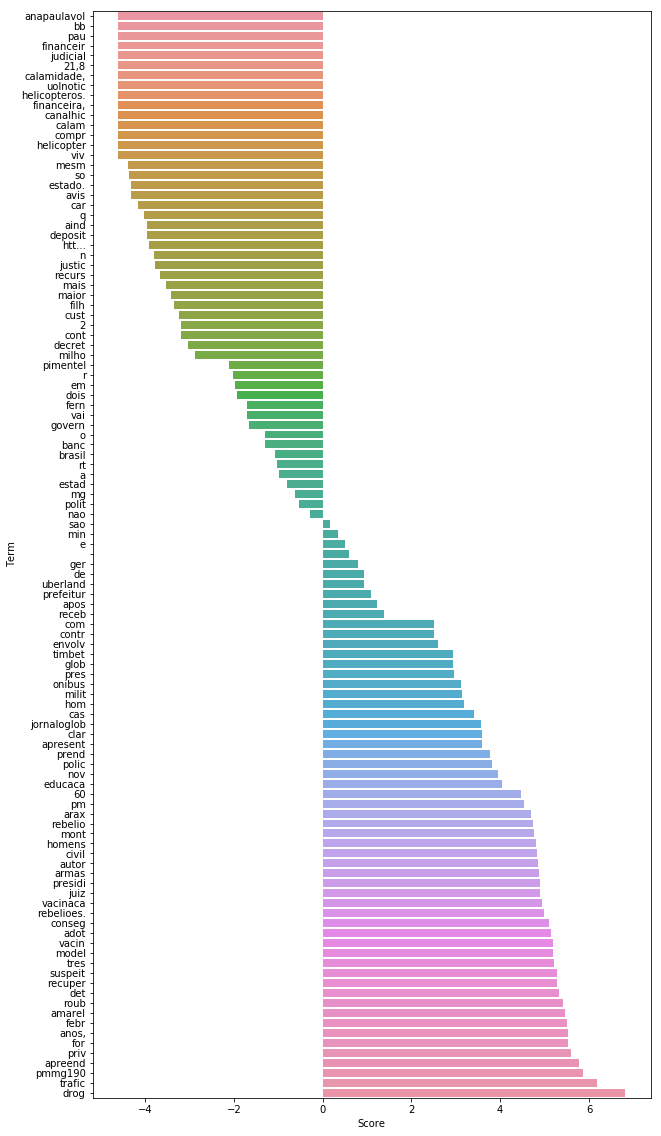

In [566]:
import seaborn as sns
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10, 20))
sns.barplot(ax = ax, y="Term", x="Score", data=df_pos_neg_ratios.sort_values(["Score"]) )

## Construíndo o Nosso Classificador

**A função `get_scores` extrai os scores das palavras de uma sentença**

Observe que apenas temos o score de algumas palavras, aquelas que mais aparecem nos negativos e positivos.

In [567]:
def get_scores (sentence, pos_neg_ratios):
    keys = pos_neg_ratios.keys()
    words = [word for word in sentence.split(' ') if word in keys]
    word_scores = [ pos_neg_ratios[word] for word in words ]
    return word_scores

**Visualizando os scores de frases**

In [584]:
for i in range(6):
    print('Text:{}'.format(dfnew.Text[i]) )
    scores = get_scores(dfnew.Text[i], pos_neg_ratios)
    print('Scores:{}\n'.format( np.around(scores,3)) )    

Text:defesaagropecu govern min ger apost arranj produt loc ritd 
Scores:[-1.669  0.356  0.793  0.603]

Text:ebc govern min investig cas suspeit febr amarel mal estad 
Scores:[-1.669  0.356  3.418  5.283  5.499  5.468 -0.801  0.603]

Text:min vai dobr ofert trabalh estud presidi estad
Scores:[ 0.356 -1.693  4.902 -0.801]

Text:min vai dobr ofert trabalh estud presidi estad
Scores:[ 0.356 -1.693  4.902 -0.801]

Text:sus min ger receb recurs maxim disponibiliz govern federal aco vigilanciasanitaria... 
Scores:[ 0.356  0.793  1.379 -3.664 -1.669  0.603]

Text:diegocabral75 exam ai mg, ta td bem pimentel cad dia faz melhor estad ne aind bem q dor prefeit sp nao bh
Scores:[-2.098 -0.801 -3.964 -4.015 -0.29 ]



**A função `predict` analisa os scores de uma sentença e retorna se o tweet é predito como positivo ou negativo**

Nesta função primero obtemos os scores da sentença usando 'get_scores' somamos os scores e verificamos se o valor resultante é positivo ou negativo

In [569]:
def predict ( sentence ):
    scores = get_scores( sentence, pos_neg_ratios)
    score = sum(scores)
    if (score > 0):
        return 'Positivo'
    else:
        return 'Negativo'

**Exemplos de predição**

In [589]:
for i in range(10):
    print('Predicted:', predict(dfnew.Text[i]),'; Texto:', dfnew.Text[i][:50] )

Predicted: Positivo ; Texto: defesaagropecu govern min ger apost arranj produt 
Predicted: Positivo ; Texto: ebc govern min investig cas suspeit febr amarel ma
Predicted: Positivo ; Texto: min vai dobr ofert trabalh estud presidi estad
Predicted: Positivo ; Texto: min vai dobr ofert trabalh estud presidi estad
Predicted: Negativo ; Texto: sus min ger receb recurs maxim disponibiliz govern
Predicted: Negativo ; Texto: diegocabral75 exam ai mg, ta td bem pimentel cad d
Predicted: Positivo ; Texto: israelmass ferrisss jornaloglob men 1 cois p orgul
Predicted: Negativo ; Texto: madeleinelacsk em mg sp,o estad razoavel control s
Predicted: Negativo ; Texto: madonegatt mg melhor estad
Predicted: Negativo ; Texto: mrsincer klyfor mblivr mblivrebh min govern 2003 2


**Classificando todas as sentenças (tweets) da base de dados**

Criamos uma nova coluna no nosso conjunto de dados (que contém apenas frases positivas e negativas) e predizemos qual é classe de cada frase.

Forma 1:
```python
dfnew['Predicted'] = [ predict(sentence) for sentence in dfnew.Text]
```

Forma 2:
```python
dfnew['Predicted'] = dfnew.Text.apply(predict)
```


In [594]:
dfnew['Predicted'] = dfnew.Text.apply(predict)

**Avaliação dos Resultados**

*Matriz de confusão da biblioteca sklearn*

In [599]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = dfnew.Classificacao, y_pred = dfnew.Predicted, labels=['Positivo','Negativo'])
print('Matriz de confusão:\n', cm)

Confusion Table:
 [[3041  259]
 [  85 2361]]


*Matriz de confusão da biblioteca pandas_ml*

In [637]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_true=dfnew.Classificacao.map({'Positivo': 1, 'Negativo': 0}), 
                     y_pred=dfnew.Predicted.map({'Positivo': 1, 'Negativo': 0}) )
cm

Predicted  False  True  __all__
Actual                         
False       2361    85     2446
True         259  3041     3300
__all__     2620  3126     5746

**Cálculo de Acurácia**

In [641]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true = dfnew.Classificacao, y_pred = dfnew.Predicted)
print('Accuracy: ', accuracy)

Accuracy:  0.9401322659241211


**Cálculo de Precision, Recall e F1-score**

In [642]:
from sklearn.metrics import classification_report

report = classification_report(y_true = dfnew.Classificacao, y_pred = dfnew.Predicted, labels=['Positivo','Negativo'])
print(report)

              precision    recall  f1-score   support

    Positivo       0.97      0.92      0.95      3300
    Negativo       0.90      0.97      0.93      2446

   micro avg       0.94      0.94      0.94      5746
   macro avg       0.94      0.94      0.94      5746
weighted avg       0.94      0.94      0.94      5746



# Avaliação com Novos Tweets

- Procurar na internet como fazer captura de Tweets em Python.

- Aplicar estes métodos usados nesta aula para pré-processar dados de seus tweets.

- Classifique você mesmo tweets como positivos, negativos e neutros. E verifique quais as palavras mais comuns em tweets negativos e positivos em seus tweets.